Using libraries required

In [193]:
library(ggplot2)

I.

Loading data and changing the labels

In [194]:
# loading the train and test data
train = read.csv('Task2B_train.csv', header = TRUE)
test = read.csv('Task2B_test.csv', header = TRUE)

# using comlplete.cases() to remove NULL values
train <- train[complete.cases(train), ]
test <- test[complete.cases(test), ]

# find the mean of x1 and x2 from train and test data set for plotting

## X1 and X2 mean from train dataset
train.x1.mean <- aggregate(x = train$x1,                
          by = list(train$y),              
          FUN = mean)
train.x2.mean <- aggregate(x = train$x2,                
          by = list(train$y),              
          FUN = mean)

## X1 and X2 mean from test dataset
test.x1.mean <- aggregate(x = test$x1,               
          by = list(test$y),              
          FUN = mean)
test.x2.mean <- aggregate(x = test$x2,                
          by = list(test$y),              
          FUN = mean)

# changing the labels from o and 1 to -1,1
# train labels
train$y <- as.character(train$y) # first converting labels into character
train$y[train$y == "0"] <- "-1" # chinging 0 to -1 (as character)
train$y[train$y == "1"] <- "+1" # chinging 1 to +1 (as character)
# test labels
test$y <- as.character(test$y)# first converting labels into character
test$y[test$y == "0"] <- "-1" # chinging 0 to -1 (as character)
test$y[test$y == "1"] <- "+1" # chinging 1 to +1 (as character)

Plotting the training data with classes

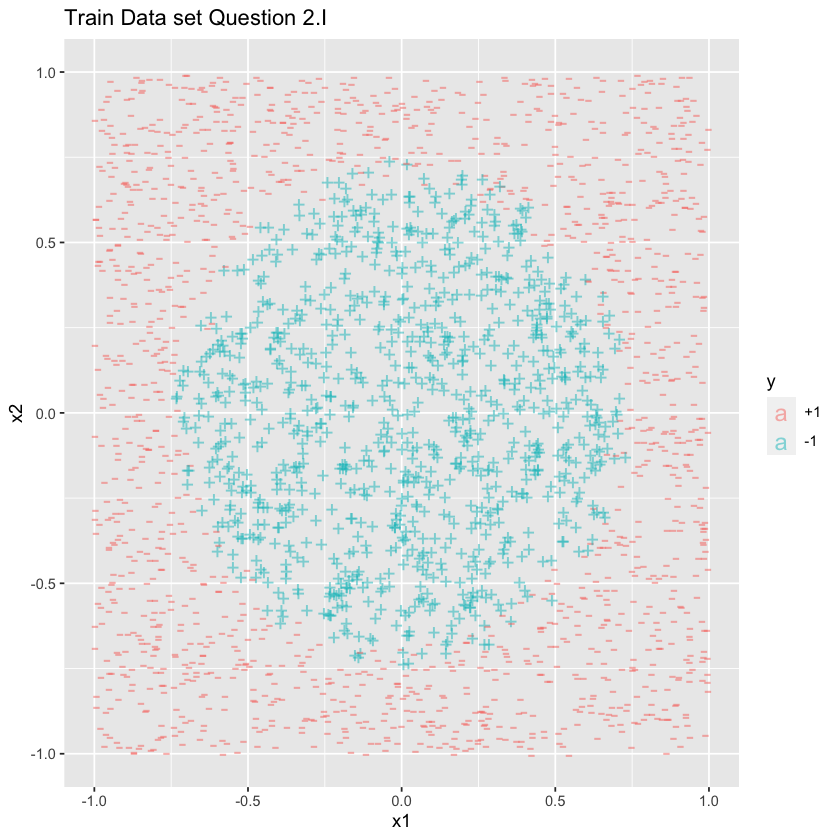

In [448]:
# ggplot for plotting
# where the input data is the train data
# x and y cordinates are x1 and x2 
# colour of the points are on the basis of labels
ggplot(data=train, aes(x=x1, y=x2, color=y, label=ifelse(y=='-1', '+', '-'))) +
    geom_text(size = 5, alpha=0.5) +
    ggtitle ('Train Data set Question 2.I') 

II. Trainning two perceptron models

Data loading using read.data function

In [5]:
##################### below code is taken directly from code base #################################

# list function to extract the X1 and X2 together with Y (labels)
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1  

In [245]:
##################### below code is taken directly from code base #################################

# error function
# to calculate misclassification mse
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

# prediction function
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}

## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}

## Perceptron Build function
perceptron.build <- function(X1, T1, eta, epsilon=0.001, tau.max=100, plotting=FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'tau', ylab = 'error', main = 'Perceptron')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last wight vector
}

Preparing the data and running the perceptron model to get the weights

In [432]:
# set.seed(10)          # set random seed
library(ggplot2)        # load libraries
list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 

Phi1 <- as.matrix(cbind(1, X2))
i<-0
while(i<=65){
# Build a perceptron and plot its train error curve
# getting the weights for each model 
# eta 0.01
W1<-perceptron.build(X1, T1, eta = 0.01, tau.max = 1000, plotting = FALSE)
# eta 0.09
W2<-perceptron.build(X1, T1, eta = 0.09, tau.max = 1000, plotting = FALSE)
# initialising the Phi matrix with the test set


# running the modelas on test set
model1.predict <- perceptron.predict(Phi1,W1)
model2.predict <- perceptron.predict(Phi1,W2)

# error on model 1
model1.error <- error.rate(model1.predict,T2)
# error on model 2
model2.error <- error.rate(model2.predict,T2)
    i<-i+1
}

# let us see which model gives lesser error
model1.error
model2.error

[1] 0.522

[1] 0.5076

I ran the perceptron model for 65 times to get the desired rate.
We saw that the model with eta 0.09 is giving less error than the model with 0.01. Hence, we are choosing the second model (model2.predict) for plotting below

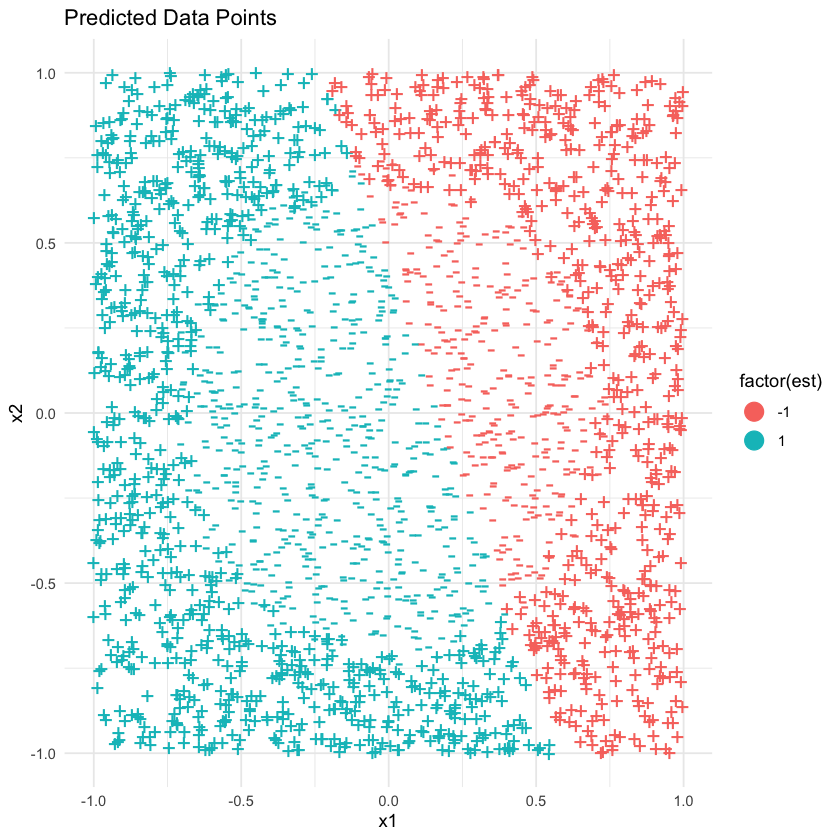

In [433]:
predict <- NULL
predict <- as.data.frame(X2)
predict$est <- model2.predict
predict$y <- T2
# plotting the test data while the points are colored with their estimated class labels 
# using the best model I selected
ggplot(data=predict, aes(x=x1, y=x2, color=factor(est))) +
  geom_point(shape = ifelse(T2==1,'+','-'), size = 5) +
  ggtitle('Predicted Data Points') +
  theme_minimal()

III. 3-layer Neural Network with combination of K and eta

In [437]:
##################### below code is taken directly from code base #################################
####################### NEURAL NET ####################### 
## the activation function (tanh here)
h <- function(z) { 
  return ((exp(z)-exp(-z))/(exp(z)+exp(-z)))
}
## the derivitive of the activation function (tanh here)
h.d <- function(z) {
return (1-(h(z))^2)
}
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}
## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    #if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
  #plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')
  return(list(W1, W2, b1, b2))
}

Loading the train and test data set as matrix

In [435]:
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))

Plotting and recording testing error

In [438]:
# K values
K <- seq(5, 100, 5) 
# eta values
eta <- c(0.01,0.09)

# initialising variables to store the K, eta and the error values of test dataset
K.value = NULL
eta.value = NULL
test.error = NULL

# running the loop
# for each K
for (k in K){
    for (t in eta){
        list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=TRUE, epoch.max=100, eta = t, lambda = 0.01)
        K.value = append(K.value, k)
        eta.value = append(eta.value, t)
        test.error = append(test.error, error.rate(nn.predict(X2.t, W1, W2, b1, b2),T2))
    }
}

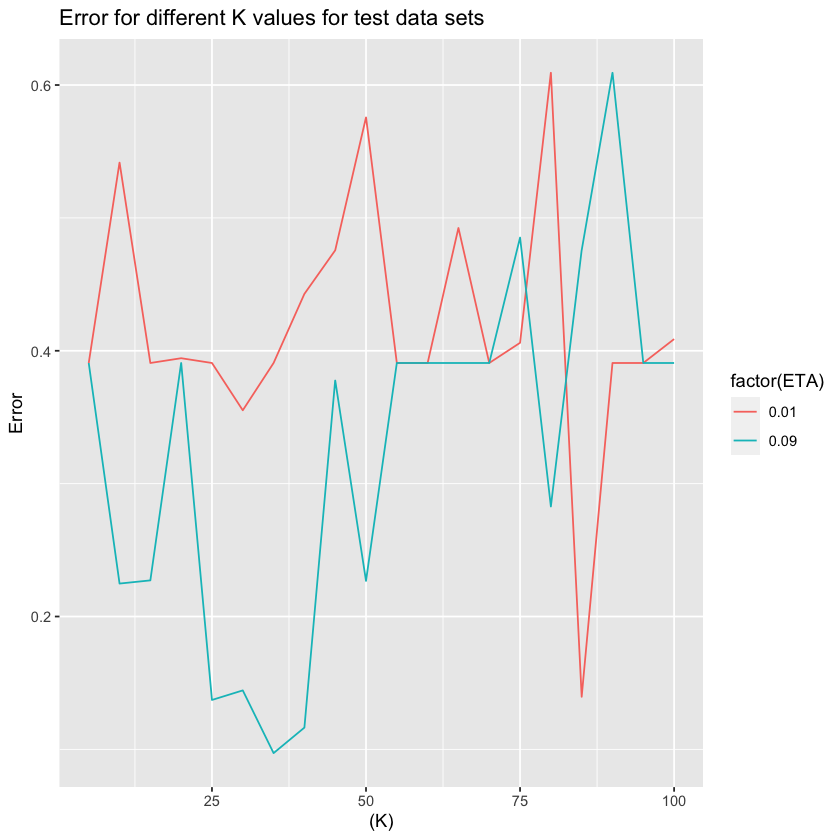

In [439]:
nn_error = data.frame(K.value, eta.value, test.error)
# pdf(file = "3 layer error vs augmented error")
nn_error$eta.value[nn_error$eta.value == 0.01] <- "0.01"
nn_error$eta.value[nn_error$eta.value == 0.09] <- "0.09"
names(nn_error) <- c('K', 'ETA',  'Error') #rename the columns being reshaped

#Plotting the error graph
ggplot(data=nn_error, aes(x=(K), y=Error, color=factor(ETA))) + geom_line() + ggtitle("Error for different K values for test data sets")
# dev.off()

The best combination from my above plot is K = 40 and eta = 0.09 as at that point, the error is reaching global minimum.

Plotting with the best model: Number of layers = 40 and eta = 0.09

VI.

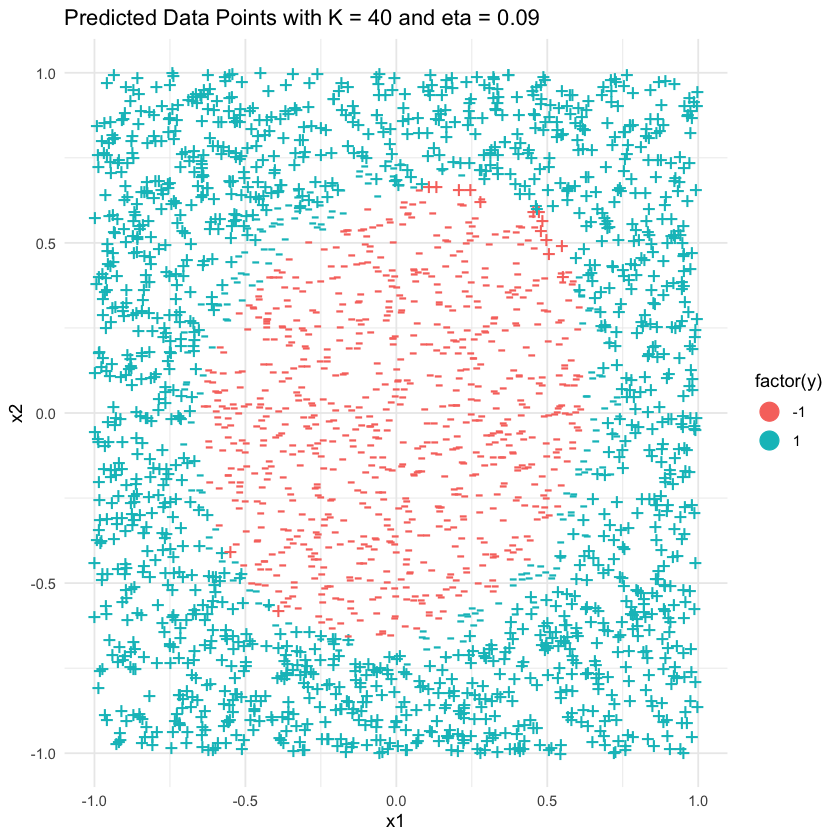

In [449]:
# set.seed(123)
list[W1, W2, b1, b2]<- nn.build(40, X1.t, T1, plotting=TRUE, epoch.max=100, eta = 0.09, lambda = 0.01)
predict <- NULL
predict <- as.data.frame(X2)
#storing the preicted values using the best model and predict function
predict$y <- t(as.data.frame(nn.predict(X2.t, W1, W2, b1, b2, threshold=0)))

# plotting the test data while the points are colored with their estimated class labels 
# using the best model I selected
ggplot(data=predict, aes(x=x1, y=x2, color=factor(y))) +
  geom_point(shape = ifelse(T2==1,'+','-'), size = 5) +
  ggtitle('Predicted Data Points with K = 40 and eta = 0.09') +
  theme_minimal()

We can see from the plots in II. And III. that the decision boundary shape is different. Perceptron is building a linear boundary shape and 3-layer NN is building a non-linear shape boundary.
Hence, the general theory that 3-layer NN being a non-linear decision boundary and perceptron being a linear decision boundary algorithm is proved.




